In [1]:
import cveig
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import binom
import pickle
from tqdm.autonotebook import tqdm
import seaborn as sns
from scipy.io import mmread
import networkx as nx

<ipython-input-1-903ea4bd54e4>:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
k = 2
n_tries = 100
expected_degrees = np.arange(3.5, 106, 3.5)
types = ['Bernoulli', 'Poisson']

In [3]:
results = np.empty((n_tries, len(expected_degrees), len(types), 4))

for d, degree in enumerate(tqdm(expected_degrees)):
    for i in tqdm(range(n_tries)):
        for j, type in enumerate(types):
            deg = degree
            if degree == np.floor(degree):
                deg = int(degree)

            file = f'../../masters_r/samples_t/graph_{type}_{deg}_{i+1}.table'
            # print(file)
            #adj_matrix = pd.read_table(file, sep=' ').to_numpy()
            adj_matrix = mmread(file)
            adj_matrix = sparse.csr_array(adj_matrix)

            results[i, d, j] = cveig.eig_cv(adj_matrix, 4, 0.05, folds=1, return_t=True)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
with open('results_t3.pickle', 'wb') as f:
    pickle.dump(results, f)

In [3]:
with open('results_t3.pickle', 'rb') as f:
    results = pickle.load(f)

In [4]:
names = ['sample', 'degree', 'type', 'vector']
labels = [np.arange(n_tries), expected_degrees, types, np.arange(4)]

In [5]:
index = pd.MultiIndex.from_product(labels, names=names)
result_df = pd.DataFrame(results.reshape(-1, 1),index=index)
result_df.columns = ['value']

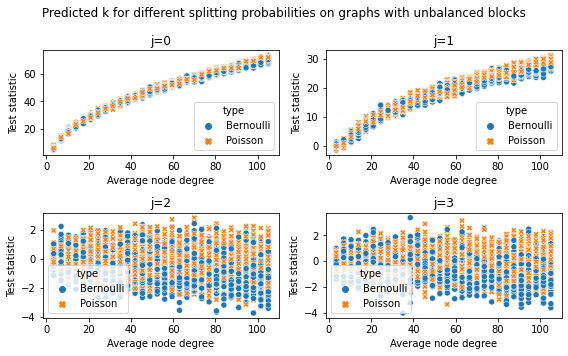

In [6]:
fig, ax = plt.subplots(2,2, figsize=(8,5))
degrees = []
for j in range(4):
    # ax[i, j].set_title(theta)
    sns.scatterplot(
        x="degree", 
        y="value", 
        ci=None, 
        data=result_df.loc[:, :, :, j], 
        ax=fig.axes[j],
        hue='type',
        style='type',
        )
    #fig.axes[j].set_ylim(0, 14)
    fig.axes[j].set_title(f'{j=}')
    #fig.axes[j].axhline(10)
    fig.axes[j].set_xlabel('Average node degree')
    fig.axes[j].set_ylabel('Test statistic')
    #if j>0: ax[j].set_ylabel(None)



#ax[0].set_ylabel('Average error')
#ax[1].set_xlabel('Expected vertex degree')
#handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right', title='Number of folds')
fig.suptitle('Predicted k for different splitting probabilities on graphs with unbalanced blocks')
fig.tight_layout()
fig.savefig('test_t.png')

In [7]:
result_prop = results > 1.65
result_prop = np.sum(result_prop, axis=0)
result_prop = result_prop / 100

In [8]:
names_prop = ['degree', 'type', 'vector']
labels_prop = [expected_degrees, types, np.arange(4)]

In [9]:
index_prop = pd.MultiIndex.from_product(labels_prop, names=names_prop)
result_df_prop = pd.DataFrame(result_prop.reshape(-1, 1),index=index_prop)
result_df_prop.columns = ['ratio']

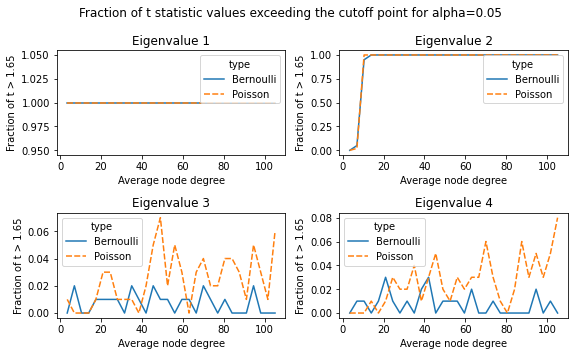

In [11]:
fig, ax = plt.subplots(2,2, figsize=(8,5))
degrees = []
for j in range(4):
    # ax[i, j].set_title(theta)
    sns.lineplot(
        x="degree", 
        y="ratio", 
        ci=None, 
        data=result_df_prop.loc[:, :, j], 
        ax=fig.axes[j],
        hue='type',
        style='type',
        )
    #fig.axes[j].set_ylim(0, 14)
    fig.axes[j].set_title(f'Eigenvalue {j+1}')
    #fig.axes[j].axhline(10)
    fig.axes[j].set_xlabel('Average node degree')
    fig.axes[j].set_ylabel('Fraction of t > 1.65')
    #if j>0: ax[j].set_ylabel(None)



#ax[0].set_ylabel('Average error')
#ax[1].set_xlabel('Expected vertex degree')
#handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right', title='Number of folds')
fig.suptitle('Fraction of t statistic values exceeding the cutoff point for alpha=0.05')
fig.tight_layout()
fig.savefig('test_t_ratio.png')